# **Titanic Veri Seti Sütunları Hakkında Bilgi**

**PassengerId:** Yolcu numarasıdır. Her bir yolcunun benzersiz bir kimliği vardır.

**Survived:** Yolcunun hayatta kalıp kalmadığını belirtir. 0 ölümü, 1 ise hayatta kaldığı anlamına gelir.

**Pclass:** Yolcu sınıfını ifade eder. 1, 2 veya 3 değerlerini alır; 1 en üst sınıfı, 3 ise en alt sınıfı temsil eder.

**Name:** Yolcunun adı.

**Sex:** Yolcunun cinsiyeti.

**Age:** Yolcunun yaşını belirtir.

**SibSp:** Yolcunun gemide bulunan kardeş/eş sayısını temsil eder.

**Parch:** Yolcunun gemide bulunan ebeveyn/çocuk sayısını temsil eder.

**Ticket:** Bilet numarası veya kodu.

**Fare:** Yolcu tarafından ödenen bilet ücreti.

**Cabin:** Yolcunun kabin numarası. Bazı veriler eksik olabilir.

**Embarked:** Yolcunun gemiye bindiği limanı ifade eder. 
- C = Cherbourg
- Q = Queenstown
- S = Southampton.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

# **Veriyi Okutma**

**pandas** kütüphanesinin sağlamış olduğu özellikle birlikte farklı türlerdeki verileri DataFrame tipine çevirerek hızlı bir şekilde okutabiliriz.

- **read_csv**: Virgülle ayrılmış değer dosyalarını (CSV) okur ve bunları DataFrame'e dönüştürür.
- **read_excel**: Excel dosyalarını okur ve bunları DataFrame'e dönüştürür.
- **read_json**: JSON dosyalarını okur ve bunları DataFrame'e dönüştürür.
- **read_sql**: SQL veritabanlarından sorgularla veri çeker ve bunları DataFrame'e dönüştürür.
- **read_html**: HTML sayfalarından tabloları okur ve bunları DataFrame'e dönüştürür.


In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Bu `check_df()` fonksiyonu, bir DataFrame'in farklı özelliklerini kontrol eder ve şu bilgileri verir:

- **Shape**: DataFrame'in boyutunu, yani satır ve sütun sayısını gösterir. Bu `dataframe.shape` ile elde edilir.
  
- **Duplicate Values**: DataFrame içindeki tekrarlanan satırları kontrol eder ve bunların sayısını belirtir (`dataframe.duplicated().sum()`). Bu, DataFrame içindeki tekrarlanan gözlemleri gösterir.
  
- **Missing Values**: DataFrame içindeki eksik değerleri kontrol eder ve bunların toplam sayısını belirtir (`dataframe.isnull().sum().sum()`). Bu, DataFrame içindeki toplam eksik değer sayısını gösterir.
  
- **DataFrame Info**: `dataframe.info()` çağrısı, DataFrame hakkında detaylı bilgi sağlar. Bu, her sütunun adını, veri türünü, bellek kullanımını ve eksik olmayan veri sayısını gösterir.


In [3]:
def check_df(dataframe):
    print('DataFrame Shape: ', dataframe.shape, '\n')
    print('DataFrame Duplicate Values: ', dataframe.duplicated().sum(), '\n')
    print('DataFrame Missing Values: ', dataframe.isnull().sum().sum(), '\n')
    print('****DataFrame Info****', '\n')
    print(dataframe.info())

check_df(df)

DataFrame Shape:  (891, 12) 

DataFrame Duplicate Values:  0 

DataFrame Missing Values:  866 

****DataFrame Info**** 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


# **Boşluk Doldurma İşlemleri**

> Mean (Ortalama) ile Doldurma

Eğer veri normal dağılıma sahipse ve eksik değerler rastgele dağılmışsa, boşlukları ortalama değerle doldurmak mantıklı olabilir. Örneğin, **yaş** gibi sürekli bir değişkende sıklıkla kullanılır.

> Median (Ortanca) ile Doldurma

Eğer veri dağılımı normalden uzaksa ve aykırı değerler (outliers) mevcutsa, boşlukları ortanca değerle doldurmak daha uygun olabilir. Ortanca, veri setinin sıralanmış halindeki orta değeri olarak bilinir ve bu aykırı değerlerin etkisini azaltabilir.

> Mode (Mod) ile Doldurma:

Kategorik verilerde, yani sınırlı ve ayrık değerlerde, en sık tekrarlanan değerle eksiklikleri doldurmak mantıklı olabilir. Bu, örneğin, en sık görülen liman ismi gibi durumlarda kullanılabilir.

In [4]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop('Cabin', axis=1, inplace=True)

In [5]:
def check_columns(dataframe, cat_threshold=10, car_threshold=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype in ['object', 'category', 'bool']]
    num_cols = [col for col in dataframe.columns if dataframe[col].dtype in ['int64', 'float64']]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].dtype in ['int64', 'float64'] and dataframe[col].nunique() < cat_threshold]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].dtype in ['object', 'category'] and dataframe[col].nunique() > car_threshold]

    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in num_cols if col not in cat_cols]
    
    print("*****Summary*****\n")
    print(f'Categorical Columns:  {cat_cols}')
    print(f'Numerical Columns:  {num_cols}')
    print(f'Categorical but Cardinal:  {cat_but_car}')
    print(f'Numerical but Categorical:  {num_but_cat}')

    columns = num_cols + cat_cols
    return dataframe[columns], num_cols, cat_cols, num_but_cat

df, num_cols, cat_cols, num_but_cat = check_columns(df.drop('PassengerId', axis=1))

*****Summary*****

Categorical Columns:  ['Sex', 'Embarked']
Numerical Columns:  ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical but Cardinal:  ['Name', 'Ticket']
Numerical but Categorical:  ['Survived', 'Pclass', 'SibSp', 'Parch']


In [6]:
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 18, 30, 50, df['Age'].max()], labels=['Child', 'Young Adult', 'Adult', 'Senior'])
df.groupby('Age_Group')['Survived'].agg(['count', 'mean'])

,count,mean
Age_Group,,
Child,139,0.503597
Young Adult,447,0.331096
Adult,241,0.423237
Senior,64,0.343750


In [7]:
df.groupby('Pclass')['Survived'].agg(['count', 'mean'])

,count,mean
Pclass,,
1,216,0.629630
2,184,0.472826
3,491,0.242363


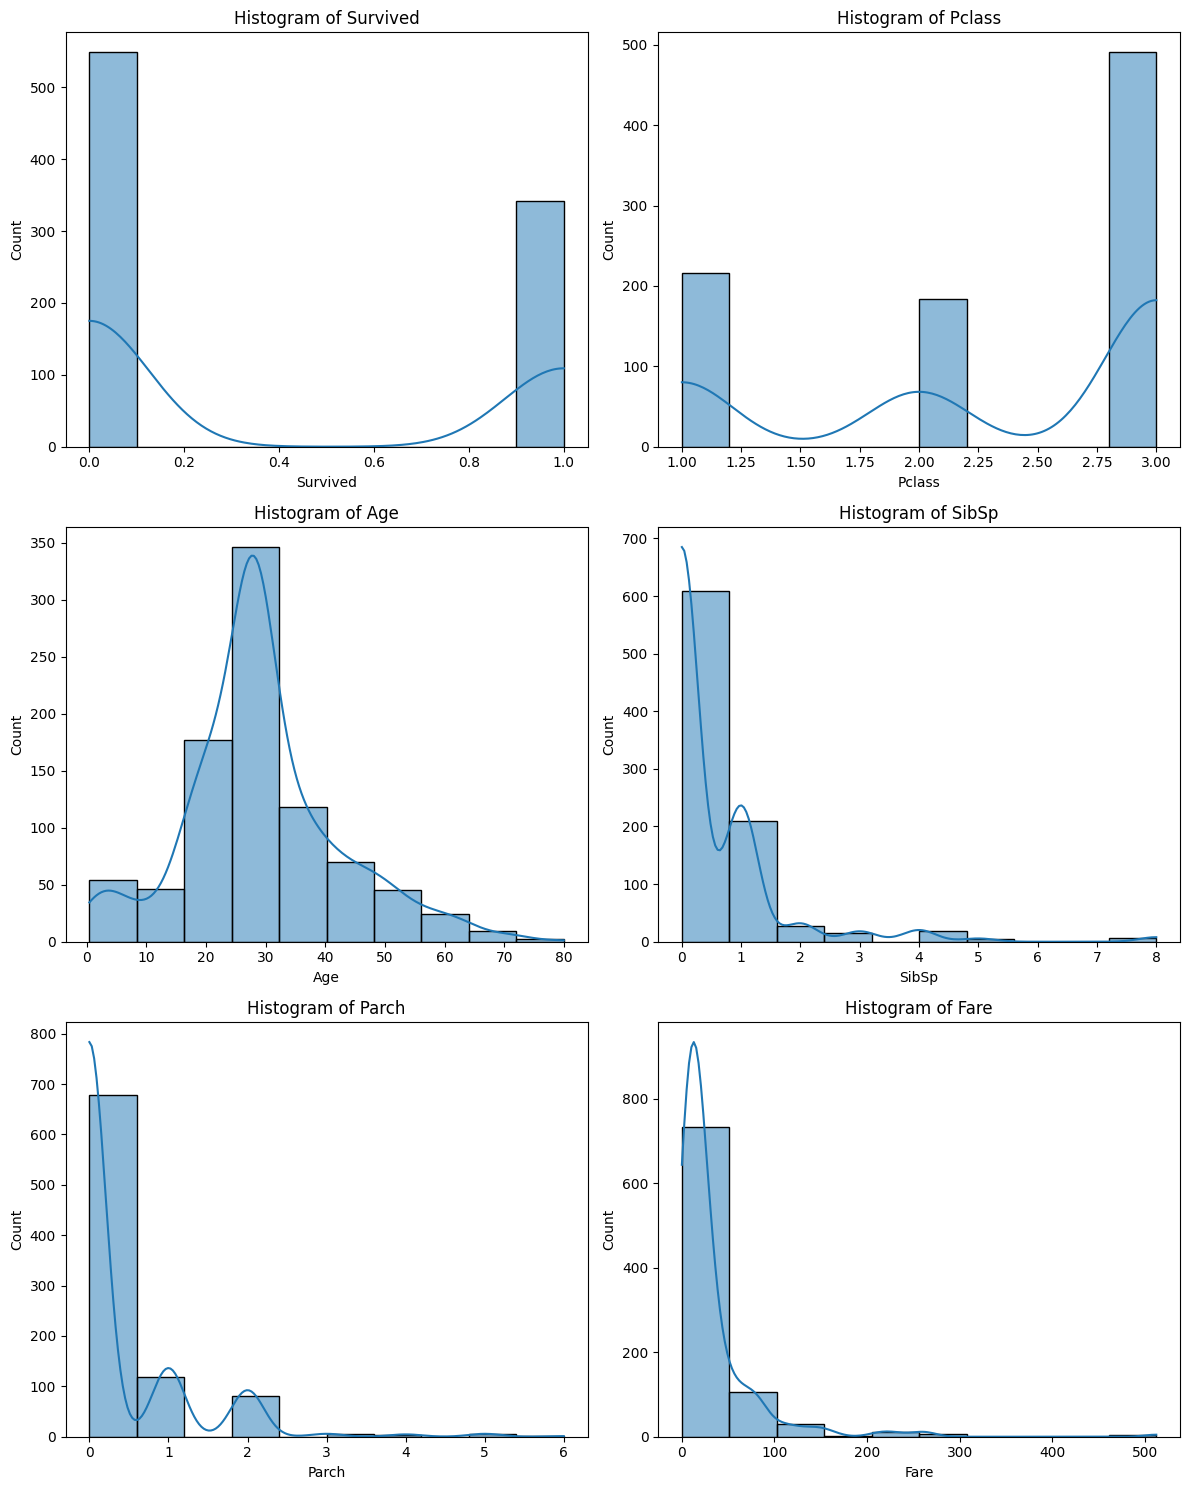

In [8]:
def hist_plot(dataframe, num_cols, ncols=2, bins=10):
    nrows = (len(num_cols) + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 5*nrows))
    
    for i, col in enumerate(num_cols):
        if col in dataframe.columns:
            ax = axes[i // ncols, i % ncols]
            sns.histplot(dataframe[col], ax=ax, bins=bins, kde=True)
            ax.set_title(f"Histogram of {col}")

    plt.tight_layout()
    plt.show()
    
hist_plot(df, num_cols)

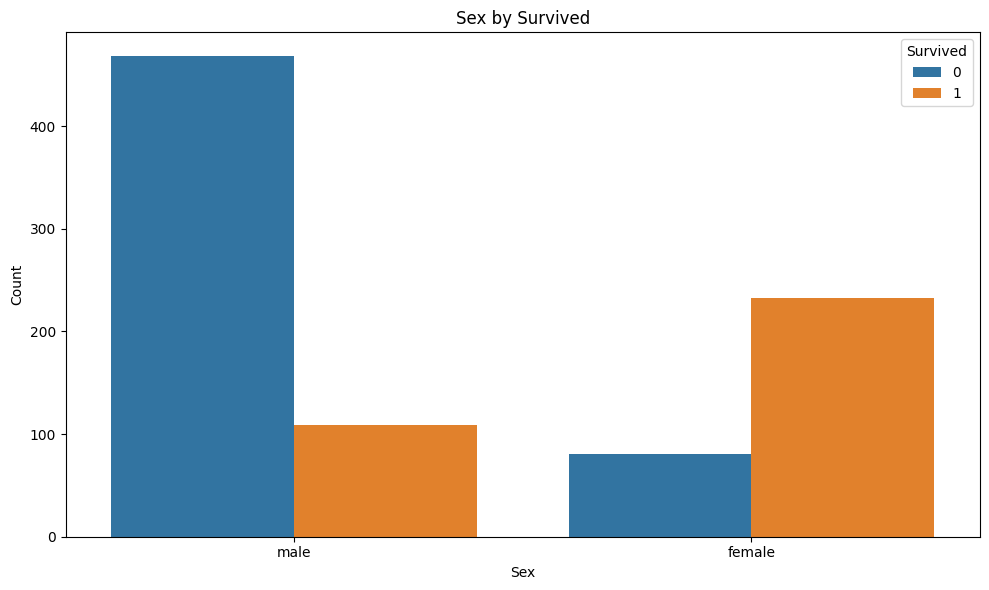

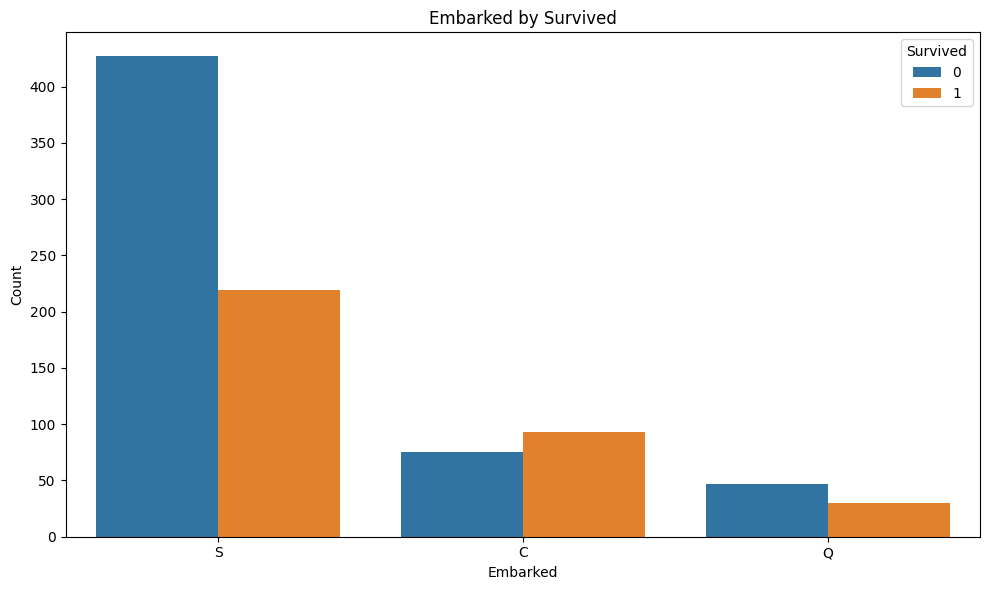

In [9]:
def categorical_plot(dataframe, target, cat_cols):
    for col in cat_cols:
        if col != target:
            plt.figure(figsize=(10, 6))
            sns.countplot(x=col, hue=target, data=dataframe)
            plt.title(f"{col} by {target}")
            plt.xlabel(col)
            plt.ylabel("Count")
            plt.legend(title=target)
            plt.tight_layout()
            plt.show()
        
categorical_plot(df, 'Survived', cat_cols)

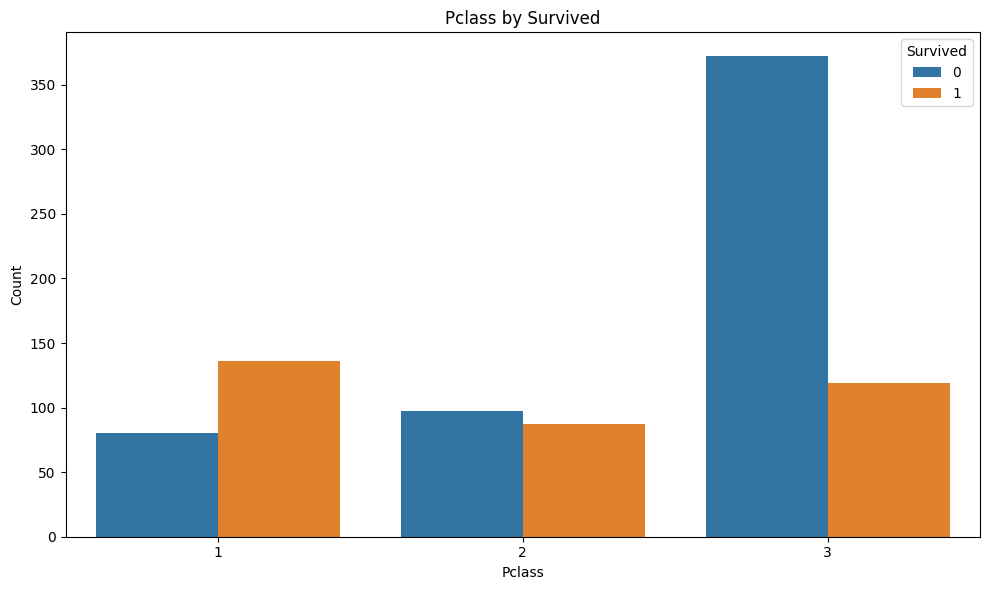

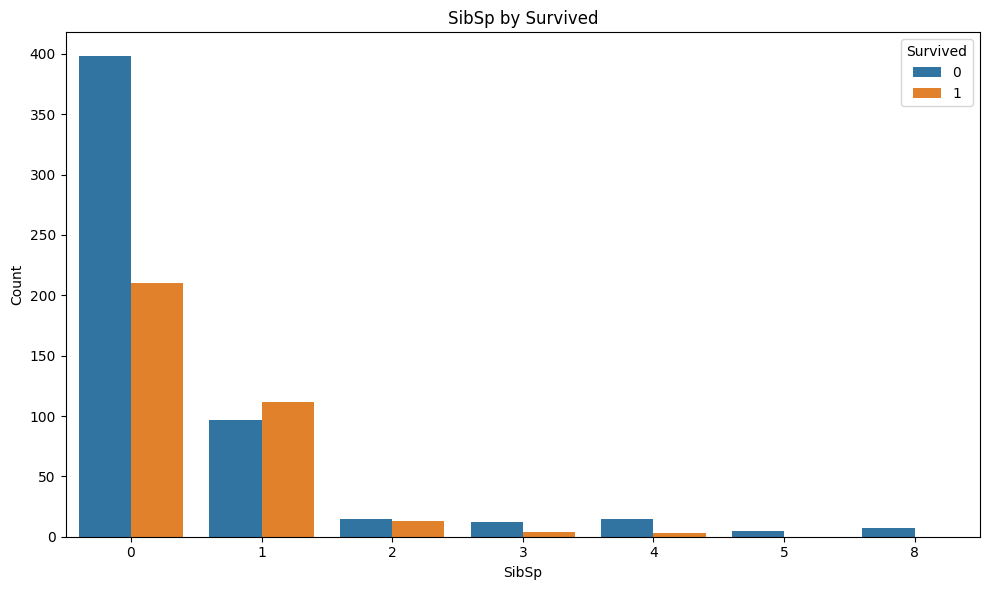

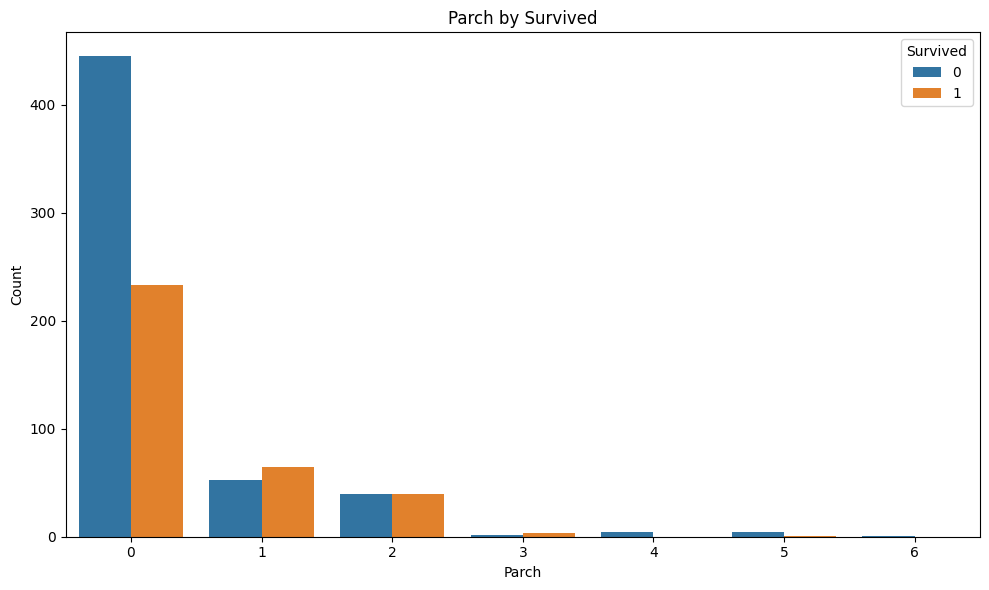

In [10]:
def numerical_plot(dataframe, target, num_but_cat):
    for col in num_but_cat:
        if col != target:
            plt.figure(figsize=(10, 6))
            sns.countplot(x=col, hue=target, data=dataframe)
            plt.title(f"{col} by {target}")
            plt.xlabel(col)
            plt.ylabel("Count")
            plt.legend(title=target)
            plt.tight_layout()
            plt.show()
        
numerical_plot(df, 'Survived', num_but_cat)

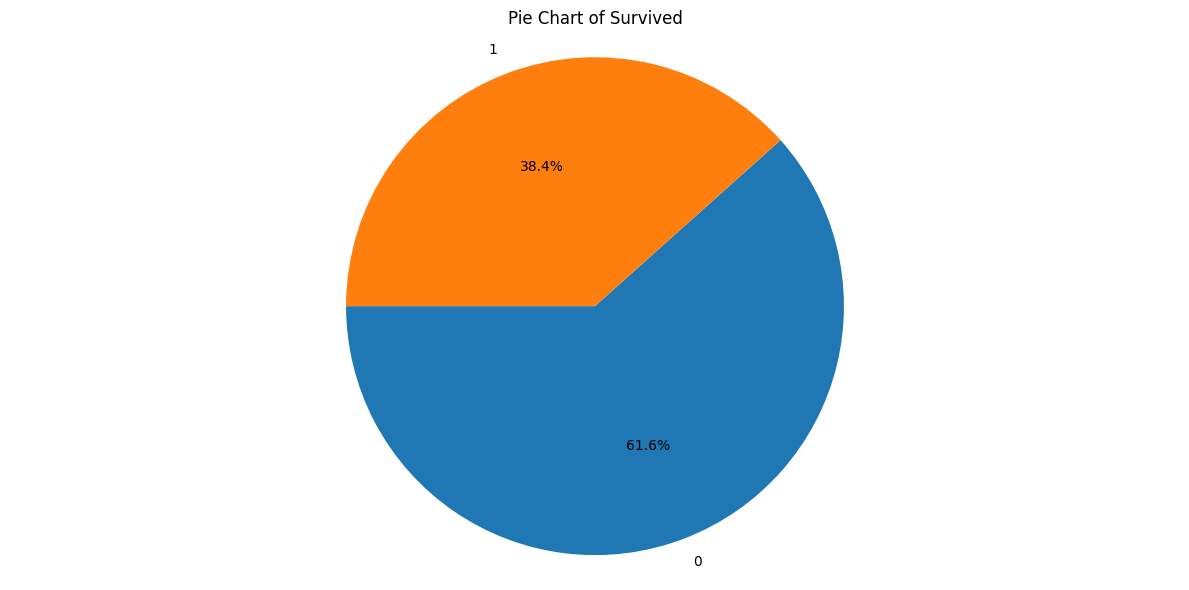

In [11]:
def target_plot(dataframe, column):
    counts = dataframe[column].value_counts()
    labels = counts.index
    values = counts.values
    
    plt.figure(figsize=(12, 6))

    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=180)
    plt.axis('equal')
    plt.title(f"Pie Chart of {column}")
    
    plt.tight_layout()
    plt.show()
    
target_plot(df, 'Survived')

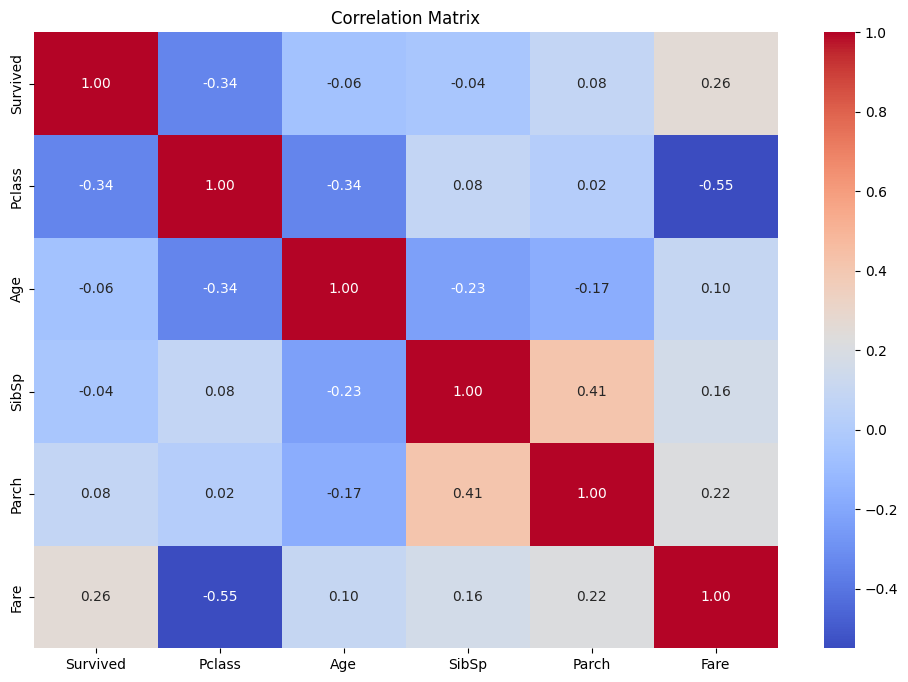

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()